In [1]:
#Importing Necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#for natural language preprocessing
import nltk
import re
nltk.download("stopwords")
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from nltk.corpus import stopwords

In [3]:
pd.options.display.max_columns
df= pd.read_csv("med.csv")

In [4]:
#df=pd.read_csv("https://raw.githubusercontent.com/aws-samples/amazon-textract-and-comprehend-medical-document-processing/main/data/mtsamples.csv")

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,description,medical_specialty,sample_name,transcription,keywords
0,0,0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [6]:
df.to_csv("med.csv")

<h2> data preprocessing</h2>

In [7]:
df.describe(include='all')

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,description,medical_specialty,sample_name,transcription,keywords
count,4999.000000,4999.000000,4999.000000,4999,4999,4999,4966,3931
unique,NaN,NaN,NaN,2348,40,2377,2357,3849
top,NaN,NaN,NaN,An example/template for a routine normal male...,Surgery,Lumbar Discogram,"PREOPERATIVE DIAGNOSIS: , Low back pain.,POSTO...",
freq,NaN,NaN,NaN,12,1103,5,5,81
mean,2499.000000,2499.000000,2499.000000,NaN,NaN,NaN,NaN,NaN
std,1443.231328,1443.231328,1443.231328,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1249.500000,1249.500000,1249.500000,NaN,NaN,NaN,NaN,NaN
50%,2499.000000,2499.000000,2499.000000,NaN,NaN,NaN,NaN,NaN
75%,3748.500000,3748.500000,3748.500000,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   Unnamed: 0.1       4999 non-null   int64 
 2   Unnamed: 0.1.1     4999 non-null   int64 
 3   description        4999 non-null   object
 4   medical_specialty  4999 non-null   object
 5   sample_name        4999 non-null   object
 6   transcription      4966 non-null   object
 7   keywords           3931 non-null   object
dtypes: int64(3), object(5)
memory usage: 312.6+ KB


### checking for null values

In [9]:
df.isnull().sum()

Unnamed: 0              0
Unnamed: 0.1            0
Unnamed: 0.1.1          0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [10]:
df.shape

(4999, 8)

In [11]:
df["keywords"].value_counts()

                                                                                                                                                                                                                                                                                                                                  81
gastroenterology                                                                                                                                                                                                                                                                                                                   2
surgery                                                                                                                                                                                                                                                                                                                            2
consult - history and phy

In [12]:
df["keywords"].isnull().sum()

1068

#removing the null values, since we don't have any data about the genres of indpendent features

In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Unnamed: 0.1.1       0
description          0
medical_specialty    0
sample_name          0
transcription        0
keywords             0
dtype: int64

### Checking for the datatypes

In [15]:
df.dtypes   #all the datatypes in a proper format

Unnamed: 0            int64
Unnamed: 0.1          int64
Unnamed: 0.1.1        int64
description          object
medical_specialty    object
sample_name          object
transcription        object
keywords             object
dtype: object

In [16]:
## CHecking for Imbalancing

In [17]:
df["medical_specialty"].value_counts()

 Surgery                          1021
 Orthopedic                        303
 Cardiovascular / Pulmonary        280
 Radiology                         251
 Consult - History and Phy.        234
 Gastroenterology                  195
 Neurology                         168
 General Medicine                  146
 SOAP / Chart / Progress Notes     142
 Urology                           140
 Obstetrics / Gynecology           130
 ENT - Otolaryngology               84
 Neurosurgery                       81
 Ophthalmology                      79
 Discharge Summary                  77
 Nephrology                         63
 Hematology - Oncology              62
 Pain Management                    58
 Office Notes                       44
 Podiatry                           42
 Pediatrics - Neonatal              42
 Emergency Room Reports             31
 Dentistry                          25
 Dermatology                        25
 Cosmetic / Plastic Surgery         25
 Letters                 

<AxesSubplot:xlabel='count', ylabel='medical_specialty'>

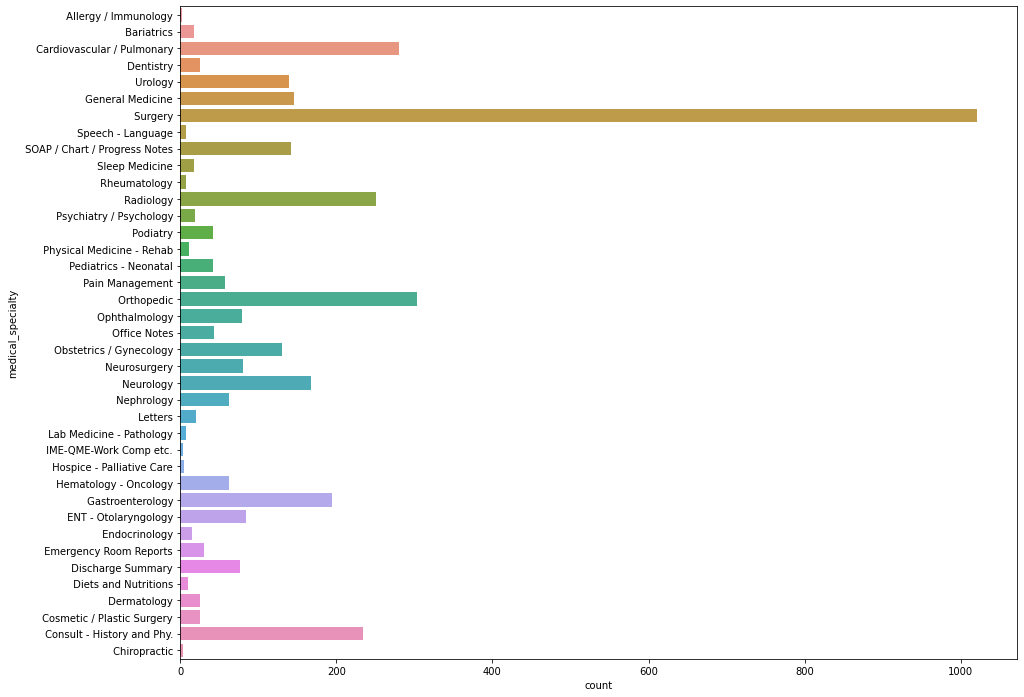

In [18]:
plt.figure(figsize=[15,12])
sns.countplot(y=df["medical_specialty"])

In [19]:
df["medical_specialty"].value_counts()


 Surgery                          1021
 Orthopedic                        303
 Cardiovascular / Pulmonary        280
 Radiology                         251
 Consult - History and Phy.        234
 Gastroenterology                  195
 Neurology                         168
 General Medicine                  146
 SOAP / Chart / Progress Notes     142
 Urology                           140
 Obstetrics / Gynecology           130
 ENT - Otolaryngology               84
 Neurosurgery                       81
 Ophthalmology                      79
 Discharge Summary                  77
 Nephrology                         63
 Hematology - Oncology              62
 Pain Management                    58
 Office Notes                       44
 Podiatry                           42
 Pediatrics - Neonatal              42
 Emergency Room Reports             31
 Dentistry                          25
 Dermatology                        25
 Cosmetic / Plastic Surgery         25
 Letters                 

In [20]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["medical_speciality_class"]= le.fit_transform(df["medical_specialty"])

In [21]:
df[["medical_specialty","medical_speciality_class"]]

,medical_specialty,medical_speciality_class
0,Allergy / Immunology,0
1,Bariatrics,1
2,Bariatrics,1
3,Cardiovascular / Pulmonary,2
4,Cardiovascular / Pulmonary,2
...,...,...
4984,Bariatrics,1
4985,Bariatrics,1
4989,Bariatrics,1
4993,Allergy / Immunology,0


#given the problem statements, the other column does not helps us classify the target except the keywords.

In [22]:
df_p= df[["keywords","medical_speciality_class"]]

In [23]:
df_p.head(15)

,keywords,medical_speciality_class
0,"allergy / immunology, allergic rhinitis, aller...",0
1,"bariatrics, laparoscopic gastric bypass, weigh...",1
2,"bariatrics, laparoscopic gastric bypass, heart...",1
3,"cardiovascular / pulmonary, 2-d m-mode, dopple...",2
4,"cardiovascular / pulmonary, 2-d, doppler, echo...",2
5,"bariatrics, gastric bypass, eea anastomosis, r...",1
6,"bariatrics, breast reconstruction, excess, lma...",1
7,"cardiovascular / pulmonary, 2-d echocardiogram...",2
8,"bariatrics, lipodystrophy, abd pads, suction-a...",1
9,"cardiovascular / pulmonary, ejection fraction,...",2


In [24]:
df_p.reset_index(drop=True, inplace=True)

###  Over-Sampling 

#we will be applying over-sampling on the data, since we dont have much data, so no need of under-sampling


In [25]:
from imblearn.combine import SMOTETomek
sampling= SMOTETomek()


#### Building the imbalanced model

#### Balancing can be applied only on training dataset

### Applying Natural Language Preprocessing on keyword features

In [26]:
re.sub("a-zA-Z"," ", df_p["keywords"][12])

'bariatrics, weight watchers, roux en y, atkins, medifast, meridia, south beach, cabbage, diets, laparoscopic roux en y gastric bypass surgery, rice, weight loss, six weeks of medifast, weight loss modalities, body mass index, gastric bypass surgery, bariatric surgery, gastric bypass,'

In [27]:
#corpus = []
#def lemmatization(data):
#for i in range(0, len(data)):
#    review = re.sub('[^a-zA-Z]', ' ', data[i])
#    review = review.lower()
#    review = review.split()
    
 #   review = [lemm.lemmatize(word) for word in review if not word in stopwords.words('english')]
 #   review = ' '.join(review)
 #   corpus.append(review)

In [28]:
#try:
#  lemmatization(df_pro["keywords"])
#except:
 #   print("The error has occured")
#else:
#    print(lemmatization(df_pro["keywords"]))


In [29]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemming= PorterStemmer()
lemm= WordNetLemmatizer()


In [31]:
corpus = []
for i in range(0, len(df_p["keywords"])):
    review = re.sub('[^a-zA-Z]', ' ', df_p["keywords"][i])
    review = review.lower()
    review = review.split()
    
    review = [lemm.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [32]:
corpus[0]

'allergy immunology allergic rhinitis allergy asthma nasal spray rhinitis nasal erythematous allegra spray allergic'

#we have converted the desease into list of semantic words using Wordnetlemmatizer,. Next step is to convert these list into bag of words forms.

In [33]:
#To convert the words into vectors we'll be using TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
X= tfidf.fit_transform(corpus)
X.shape

(3898, 5459)

In [34]:
Y= df["medical_speciality_class"]

In [35]:
#### Train test split on imbalanced data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,  y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [36]:
print("The length of the train data is:- \n", x_train.shape, y_train.shape,"\n",
     "The length of the text data is:-", x_test.shape, y_test.shape)

The length of the train data is:- 
 (3118, 5459) (3118,) 
 The length of the text data is:- (780, 5459) (780,)


In [37]:
Y_train= np.array(y_train)
Y_train= Y_train.reshape(-1,1)
Y_test= np.array(y_test).reshape(-1,1)

In [38]:
#Building the imbalanced model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, confusion_matrix, classification_report, accuracy_score

tree= DecisionTreeClassifier()
tree.fit(x_train, y_train)
pred= tree.predict(x_test)
y_score= tree.predict_proba(x_test)
train_pred= tree.predict(x_train)

print("The confusion matrix for Imbalnced- decision tree data is:-\n", confusion_matrix(y_test, pred),"/n",
     "Classification Report- Imbalanced DecisionTree :- ", classification_report(y_test, pred))

accuracy_score(y_test, pred)

The confusion matrix for Imbalnced- decision tree data is:-
 [[  0   0   0 ...   0   0   0]
 [  0   4   0 ...   0   3   0]
 [  0   0  60 ...   0   0   0]
 ...
 [  0   0   0 ...   2   0   0]
 [  0   0   0 ...   0 220   0]
 [  0   0   0 ...   0   0  31]] /n Classification Report- Imbalanced DecisionTree :-                precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.57      0.73         7
           2       1.00      0.98      0.99        61
           3       0.00      0.00      0.00         1
           4       0.81      1.00      0.90        48
           5       1.00      1.00      1.00         7
           6       0.86      0.86      0.86         7
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00        12
          10       1.00      0.94      0.97        18
          11       1.00      1.00      1.00 

0.9692307692307692

In [39]:
print(pred[1])
y_pred= np.transpose(pred)
plot_precision_recall_curve(tree, y_test, pred.reshape(-1,1))
plt.show()

37


ValueError: Expected 2D array, got 1D array instead:
array=[ 2. 37. 37. 25. 32. 37. 26. 32.  2. 11. 22. 30.  2.  5. 14.  4. 32.  1.
 37. 32. 37. 37.  2.  1. 26. 37. 14. 30. 22. 34.  2. 26. 38. 37. 32. 10.
  4. 14. 25.  2. 26.  9. 38.  4. 37. 10.  2. 23.  5. 22.  2. 10. 32.  2.
  2. 34. 34. 26. 12. 28.  2. 37. 21. 21. 37.  9. 29. 37.  4. 24. 32. 14.
 37. 37. 37. 32. 30. 24. 26.  4. 36.  9. 37. 21. 37. 22.  7. 37. 21.  9.
 20. 37. 23. 25. 18.  2. 37. 37. 14. 12. 37.  2. 14. 21. 37. 37. 37. 26.
 37. 37.  1. 14. 26. 20. 37. 26. 21. 37.  2. 37. 38. 37. 30.  4. 37. 37.
 21. 13. 23. 13. 21. 10. 13. 22. 37. 32. 37. 32. 38. 23. 32.  4. 25. 15.
 32. 37. 12. 37. 37. 37.  2. 30. 21.  1. 37. 37. 27. 37. 37. 14. 37. 31.
  7.  4. 37. 21. 10. 37. 13. 38. 22. 25. 26. 32. 37.  4. 34.  4.  2. 38.
 34. 32. 37. 37. 37. 37. 26. 14. 37. 23.  9. 20. 37.  2.  2.  2. 37. 19.
 37. 25.  6. 37. 38. 32. 35.  0.  4. 26. 37. 38. 28. 32. 31. 38. 22. 21.
  2. 30. 21. 21. 14. 37.  2. 37. 37. 32. 37. 37.  4. 38. 34. 37. 37. 38.
 37. 37. 21. 38. 32. 12. 32. 37. 37. 37. 21. 13. 38.  4. 37. 37. 37. 21.
 37.  4. 37. 37. 18.  4. 37. 11. 20. 32.  3. 21. 22. 26. 37. 37.  5. 26.
 37. 14. 30.  2. 37. 21. 19. 26. 19. 37.  4. 37. 32. 21. 36.  2. 27. 26.
 14. 24. 22. 25.  2. 38. 37.  5.  2. 37. 32. 15. 27. 32. 23. 13. 21. 37.
 10. 26. 15. 37. 37. 11. 23. 37. 13. 32.  6. 27. 27. 37.  1. 37.  4. 37.
 14. 15. 14.  2. 37. 37. 37. 21. 37. 26.  4. 34. 37.  2.  4. 23. 37. 25.
 37. 37.  4. 34.  2.  2. 26.  2. 37. 26. 14. 38. 32. 38.  4. 37. 37. 26.
 32. 15. 38. 35. 11. 37. 37. 26. 25. 10. 37. 21. 37. 13. 38.  5. 37. 37.
 34.  4. 25. 37. 31. 13. 32. 37. 34. 37.  4. 10. 30. 26. 21. 26. 37. 33.
 13. 37. 37. 13. 37. 32. 37. 32. 14. 26. 37. 15. 10. 23. 34. 26. 26.  2.
 25.  9. 24.  6.  4. 11. 37. 32. 13. 37. 26. 37. 38. 38. 24.  4. 37. 25.
 37.  8. 21. 10. 34. 23. 23. 23. 37. 10. 37.  4.  2.  2. 38. 37.  4. 37.
 29.  4.  4. 25. 37. 33.  2. 37. 38. 10.  4. 13. 26. 23. 34. 37. 32. 21.
  9. 37. 38. 25. 37. 37.  2. 34. 20.  2. 13. 38.  4. 37.  2.  2. 26. 20.
 37. 27.  2. 37.  4. 37. 32. 38. 37.  2. 34. 37.  2. 13. 37. 37.  1. 37.
 26. 37. 37. 37. 37. 37. 13. 26. 13. 37.  2. 37. 26.  9. 22. 37. 37. 37.
 37. 37. 38. 34. 31.  4.  7. 13. 37. 37. 37. 26. 34.  2. 37. 26. 15. 37.
  8. 22.  7. 32.  6. 38. 37. 37. 33. 37. 26. 37. 23. 26. 30.  2. 14. 26.
  2.  4.  2. 21. 37. 34. 32. 14.  4. 37. 37. 26. 22. 13. 37. 37. 38.  2.
 32.  4. 38. 10. 37. 31. 37. 26.  2. 14. 37. 37.  4. 12. 23.  6.  2. 37.
 32. 34. 10. 26. 37. 37.  4.  2. 26. 18. 14.  4. 20. 26. 32. 37. 23. 37.
 19. 32. 37. 37. 37. 30. 22. 34. 21. 15. 37. 13.  2. 34. 37. 26. 13. 14.
 32. 34. 31. 32. 37. 15. 13.  4. 26. 11. 26. 34. 32.  9. 37. 37. 10. 37.
 37. 10.  6. 27. 21. 25. 37. 37. 23. 13. 37. 19. 37. 28. 19. 23. 26. 37.
 21. 15.  2. 13. 24. 13.  2. 37.  9. 37. 37. 26. 26. 13. 37. 10.  1. 38.
  4. 26. 37. 20.  2. 37.  2.  2. 37. 22. 22. 37. 21.  4. 15. 38. 37. 32.
 14. 21. 13. 27.  9. 37.  6.  4. 21. 32. 14.  5. 32. 20. 22. 34. 37. 37.
 37. 13. 37. 32. 37. 10.  4. 26. 37. 13.  2. 37. 32.  2. 37. 13. 37. 25.
 32. 37. 37. 32. 37. 37. 19. 37. 22. 37. 37.  4. 37.  2. 21.  8. 32. 32.
 14.  4. 14. 13. 22. 13. 27. 32.  2.  4. 37. 14. 37.  4.  0. 13.  5.  2.
  9. 22. 37. 37. 13. 37.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_pred= np.array(pred).reshape(-1,1)
#plot the metrics
plot_roc_curve(tree, y_test, pred)
plt.show()



##### Inference:- we have converted the text into semantic vectors, 

In [ ]:
import imblearn
print(imblearn.__version__)

In [ ]:
# handling imbalanced dataset by oversampling
from imblearn.over_sampling import SMOTE


In [ ]:
df.head()

In [ ]:
#from nltk.corpus import stopwords

In [ ]:
#Converting paragraphs into words
#import stopwords
#for i in range(len(df["description"])):
#    review= re.sub("[a-zA-Z]", " ",df["description"][i])
  #  review= review.lower()
  #  review= review.split()
#    review= [WordNetLemmatizer().lemmatize(word) for word in review if not word in set(stopwords.words("english"))] 
 #   review= " ".join(review)

In [ ]:
df_l= df[["keywords","medical_specialty"]]

In [ ]:
df_l.head()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve


### Handling Imbalaning in the Target features

The first strategy involves the creation of a pipeline, which undersamples the majority classes and oversamples the minority classes. 

In [ ]:
!pip install collection

In [ ]:
import numpy as np
from collections import Counter
n_samples = Counter.median().astype(np.int64)

In [ ]:
import collection

In [ ]:
def sampling_strategy(X,Y, n_sample, t_majority)